# Predicting Home Prices in Ames, IA (Kaggle challenge) 
### Notebook 03 - Determining how different features affect home prices


_Author: Joe Serigano (jserigano4@gmail.com)_

---

**Objectives:**
- Use cleaned data sets (from notebook 01) to create a linear regression model to determine how different features affect home prices.

We will examine a housing data set consisting of ~80 variables related to home price in Ames, Iowa. As a member of realty company, we will be helping families get their homes ready to sell. 
The main question we have been tasked with answering is: **What characteristics of a home are most likely to increase the sale price, and what changes can be made to increase sale price before putting a home on the market?**

In [1]:
#Importing relevant modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

import warnings
warnings.simplefilter("ignore")

First, we will read in our clean data sets, drop unwanted columns, and perform a train/test split to for our model.

In [2]:
# Reading in our cleaned training data and our test data that will be used for the class kaggle competition
train = pd.read_csv('datasets/train_cleaned_2.csv')
test = pd.read_csv('datasets/test_cleaned_2.csv')

train = train.drop(columns = ['Unnamed: 0'])
test = test.drop(columns = ['Unnamed: 0'])

# Setting up our X and y from our full training data
X = train.drop(columns = ['SalePrice'])
y = train['SalePrice']

# Splitting our full training data into training and testing sets for model evaluation within this notebook.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

We want to get a sense of the effect that certain characteristics/variables of a house have on the overall sale price. In order to do this, we must first standardize the variables in order to  more easily compare the relative strength of the effect they have on sale price.

Since we are interested in what changes can be made to increase sale price, we will only be looking at variables that are capable of being changed by the homeowner. For example, we will not be comparing neighborhoods since the homeowner will not be able to move their house to a different location. Instead, we will be looking at other factors such as the quality of the home, the number of bathrooms, the overall size of the home, etc.

In [21]:
X_test.shape

(508, 77)

In [20]:
train.columns

Index(['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Total Bath', 'Total SF', 'SalePrice', 'Roof Matl_Membran',
       'Roof Matl_Metal', 'Roof Matl_Roll', 'Roof Matl_Tar&Grv',
       'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exter Qual_Fa',
       'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Cond_Fa', 'Exter Cond_Gd',
       'Exter Cond_Po', 'Exter Cond_TA', 'Bsmt Cond_Fa', 'Bsmt Cond_Gd',
       'Bsmt Cond_None', 'Bsmt Cond_Po', 'Bsmt Cond_TA', 'BsmtFin Type 1_BLQ',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ', 'BsmtFin Type 1_None',
       'BsmtFin Type 1_Rec', 'BsmtFin Type 1_Unf', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'Heating QC_Fa', 'Heating QC_Gd', 'Heating QC_Po', 'Heating QC_TA',
       'Central Air_Y', 'Kitchen Qual_Fa', 'Kitchen Qual_

In [3]:
# Instantiate.
ss = StandardScaler()

# Fit and transform.
X_train_sc = ss.fit_transform(X_train)

# Transform.
X_test_sc = ss.transform(X_test)

Next, we will instantiate our model. We will be using a Lasso linear regression model. This is advantageous because a Lasso model adds a penalty terms that minimizes the coefficients of some parameters. In lasso regression, the penalty term has the ability to zero out some coefficients, essentially performing feature selection. Thus, this is a desirable model to use when we have many different variables. We will use LassoCV to find the optimal alpha.

In [4]:
# Setting up a list of Lasso alphas to check.
l_alphas = np.logspace(-5, 0, 100)

# Cross-validating over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)

# Fitting model using best Lasso alpha.
lasso_cv.fit(X_train_sc, y_train)

LassoCV(alphas=array([1.00000000e-05, 1.12332403e-05, 1.26185688e-05, 1.41747416e-05,
       1.59228279e-05, 1.78864953e-05, 2.00923300e-05, 2.25701972e-05,
       2.53536449e-05, 2.84803587e-05, 3.19926714e-05, 3.59381366e-05,
       4.03701726e-05, 4.53487851e-05, 5.09413801e-05, 5.72236766e-05,
       6.42807312e-05, 7.22080902e-05, 8.11130831e-05, 9.11162756e-05,
       1.02353102e-04, 1.14975700e-0...
       6.89261210e-02, 7.74263683e-02, 8.69749003e-02, 9.77009957e-02,
       1.09749877e-01, 1.23284674e-01, 1.38488637e-01, 1.55567614e-01,
       1.74752840e-01, 1.96304065e-01, 2.20513074e-01, 2.47707636e-01,
       2.78255940e-01, 3.12571585e-01, 3.51119173e-01, 3.94420606e-01,
       4.43062146e-01, 4.97702356e-01, 5.59081018e-01, 6.28029144e-01,
       7.05480231e-01, 7.92482898e-01, 8.90215085e-01, 1.00000000e+00]))

In [5]:
print(f'The optimal alpha value is {lasso_cv.alpha_}')
print(f'Training R2: {lasso_cv.score(X_train_sc, y_train)}')
print(f'Testing R2: {lasso_cv.score(X_test_sc, y_test)}')

The optimal alpha value is 1.0
Training R2: 0.8909335076086932
Testing R2: 0.8722592949261546


Our model does a pretty good job at fitting the data. 87.2% of the variance/variability in home sale price in our test data can be explained by the features in our model. Let's make sure we are properly fitting the data:

In [6]:
preds = lasso_cv.predict(X_test_sc)
resids = y_test - preds

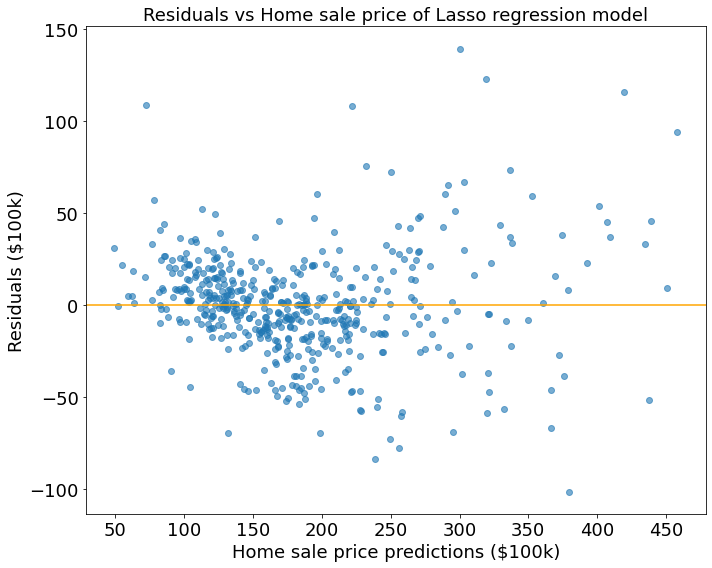

In [16]:
fsize = 18

plt.figure(figsize = (10,8))
plt.scatter(preds/1000, resids/1000, alpha = 0.6)
plt.axhline(0, color = 'orange');
plt.xlabel('Home sale price predictions ($100k)', fontsize = fsize)
plt.ylabel('Residuals ($100k)', fontsize = fsize)
plt.title('Residuals vs Home sale price of Lasso regression model', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);
plt.tight_layout();
plt.savefig('figures/resids_scatter.png',facecolor = 'white')

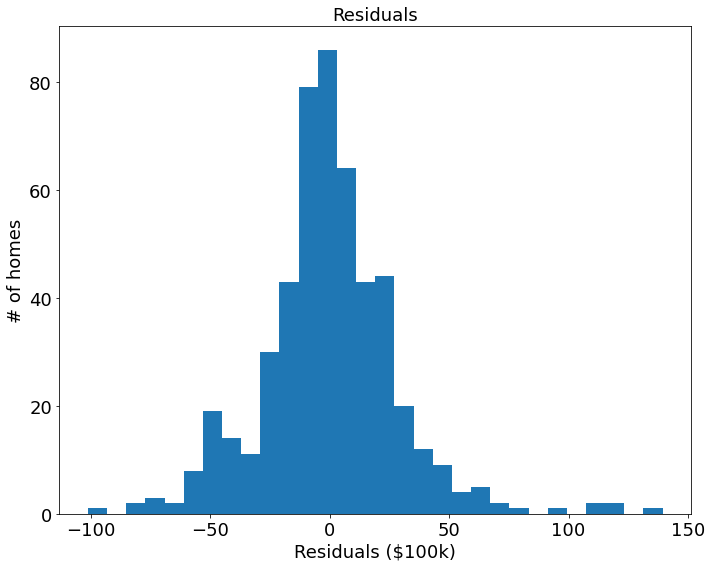

In [17]:
plt.figure(figsize = (10,8))
plt.hist(resids/1000, bins = 30)
plt.xlabel('Residuals ($100k)', fontsize = fsize)
plt.ylabel('# of homes', fontsize = fsize)
plt.title('Residuals', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);
plt.tight_layout();
plt.savefig('figures/resids_hist.png',facecolor = 'white')

In [9]:
lasso_coefs = lasso_cv.coef_
lasso_coefs = pd.Series(lasso_coefs, X.columns)
lasso_coefs[lasso_coefs != 0].sort_values(ascending = False)

Total SF           28179.303158
Overall Qual       14781.269838
Garage Area         9587.931724
Pool QC_Gd          5570.852212
Gr Liv Area         5280.676450
                       ...     
Pool Area         -12120.607214
Kitchen Qual_Gd   -17823.433703
Kitchen Qual_TA   -19828.857638
Exter Qual_Gd     -20313.416166
Exter Qual_TA     -25296.367095
Length: 73, dtype: float64

We still have many non-zero coefficients. Coefficients that are larger in magnitude have a stronger effect on home price, so let's look only at variables with the largest coefficient magnitude. 

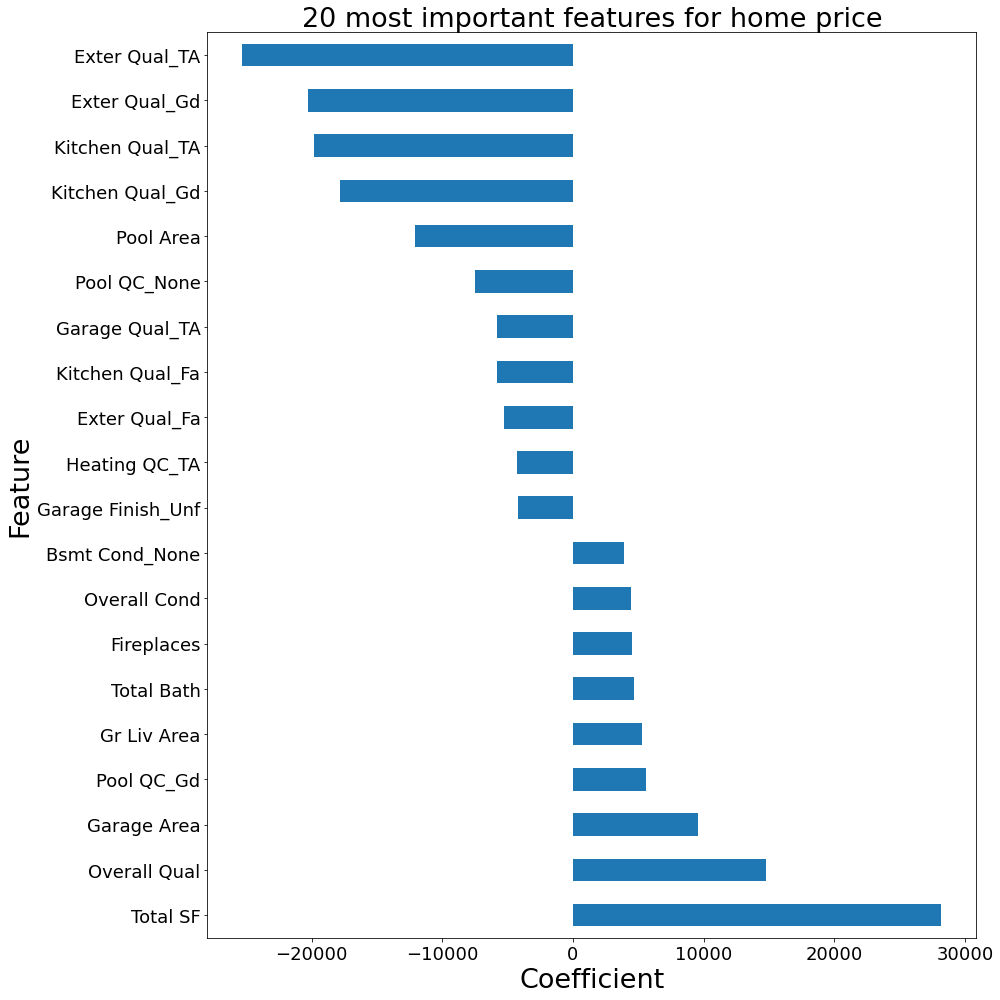

In [18]:
plt.figure(figsize = (14,14))
lasso_coefs[abs(lasso_coefs) > 3750].sort_values(ascending = False).plot.barh();
plt.xlabel('Coefficient', fontsize = fsize*1.5)
plt.ylabel('Feature', fontsize = fsize*1.5)
plt.title('20 most important features for home price', fontsize = fsize*1.5)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);
plt.tight_layout();
plt.savefig('figures/coefs.png',facecolor = 'white')